## Single file demo

In [1]:
import xarray
import numpy
import matplotlib.pyplot as plt

In [2]:
modis_wv_tif = '/disk2/Data/MOD05_L2_day_GeoTiff/2018/MOD05_L2.A2018200.tif'

In [3]:
modis_wv_ds = xarray.open_rasterio(modis_wv_tif)
modis_wv_dn = numpy.array(modis_wv_ds[0])
modis_wv_v = modis_wv_dn*0.001+0.0 # DN -> ture value

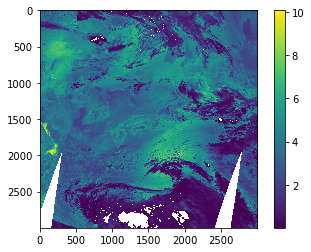

In [4]:
modis_wv_v[modis_wv_dn<0] = numpy.NaN
plt.imshow(modis_wv_v, interpolation='None')
plt.colorbar()

In [5]:
pixel_size= 0.01
# TKY site
site_loc = (36.146, 137.423) # lat, lon

site_lat_idx = int((50.0 - site_loc[0])/pixel_size)
site_lon_idx = int((site_loc[1] - 120.0)/pixel_size)

In [6]:
modis_wv_v[site_lat_idx][site_lon_idx]

2.314

## TKY water vapor during 2018

In [9]:
import os
import xarray
import numpy
import matplotlib.pyplot as plt

pixel_size= 0.01
# TKY site
site_loc = (36.146, 137.423) # lat, lon

site_lat_idx = int((50.0 - site_loc[0])/pixel_size)
site_lon_idx = int((site_loc[1] - 120.0)/pixel_size)

def read_tky_wv(modis_wv_tif):
    modis_wv_ds = xarray.open_rasterio(modis_wv_tif)
    modis_wv_dn = numpy.array(modis_wv_ds[0])
    modis_wv_v = modis_wv_dn*0.001+0.0 # DN -> ture value
    modis_wv_ds.close()
    return modis_wv_v[site_lat_idx][site_lon_idx]

In [10]:
y_wv = numpy.ones(365,)*-1
for d_idx in range(1, 366, 1):
    d_idx_str = (3-len(str(d_idx)))*'0' + str(d_idx)
    tif_filename = '/disk2/Data/MOD05_L2_day_GeoTiff/2018/MOD05_L2.A2018' + d_idx_str + '.tif'
    if os.path.exists(tif_filename):
        d_tky_wv = read_tky_wv(tif_filename)
        y_wv[d_idx-1] = d_tky_wv

Text(0, 0.5, 'Atmospheric total column water vapor (cm)')

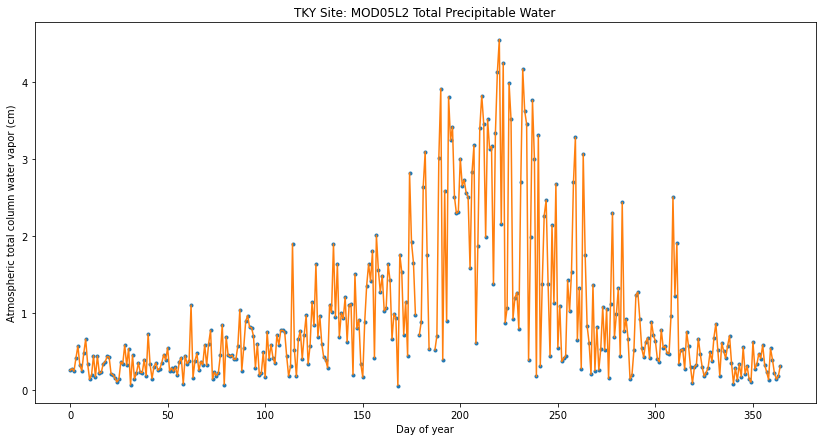

In [11]:
y_wv[y_wv<0]=numpy.NaN
plt.figure(figsize=(14,7))
plt.plot(y_wv, '.')
plt.plot(y_wv)
plt.title('TKY Site: MOD05L2 Total Precipitable Water')
plt.xlabel('Day of year')
plt.ylabel('Atmospheric total column water vapor (cm)')